In [1]:
# Network Data curationa and processing

In [2]:
from pathlib import Path
import pandas as pd
import networkx as nx
import numpy as np
from collections import defaultdict
from glob2 import glob

In [3]:
Networks_data = defaultdict(dict)

# Uniprot

In [4]:
# Uniprot 3.0 Interactions (293T Cells)
Auxiliary_Dir = "Auxiliary_data/"
Uniprot_Dir = Auxiliary_Dir + "Uniprot/"
Path(Uniprot_Dir).mkdir(parents=True, exist_ok=True)

Uniprot_URL = "https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/idmapping/by_organism/HUMAN_9606_idmapping.dat.gz"
Uniprot_File_zip = Uniprot_Dir + 'HUMAN_9606_idmapping.dat.gz'
# !wget -O {Uniprot_File_zip} {Uniprot_URL}
# !unzip -o {Uniprot_File_zip} -d {Uniprot_Dir}
# !gzip -d {Uniprot_Dir}


Uniport_dat_file = Uniprot_Dir + 'HUMAN_9606_idmapping.dat'
!ls {Uniport_dat_file}

Auxiliary_data/Uniprot/HUMAN_9606_idmapping.dat


In [5]:
# Dic_list = defaultdict(list)

Uniprot_STRING = defaultdict(list)
STRING_Uniprot = defaultdict(list)
ESNPro_Uniprot = defaultdict(list)
ESNGene_Uniprot = defaultdict(list)
Entrez_Uniprot = defaultdict(list)


ID = ""

with open(Uniport_dat_file) as fh:
    for i in fh.read().splitlines():
        t = i.split('\t')
        # if "Uniprot_Gene_name" in t:
        ID  = t[0]
        if "STRING" in t:
            Uniprot_STRING[ID].append(t[-1].replace('9606.', ''))
            STRING_Uniprot[t[-1].replace('9606.', '')].append(ID)
        if "Ensembl_PRO" in t:
            ESNPro_Uniprot[t[-1].replace('9606.', '')].append(ID)
        if "Ensembl" in t:
            ESNGene_Uniprot[t[-1].replace('9606.', '')].append(ID)
            
        if "GeneID" in t:
            Entrez_Uniprot[t[-1]].append(ID)
            
            
            
            
def Keep_first(d_dic):
    dic = {}
    for i in d_dic:
        if len(d_dic[i]) and i not in dic:
            dic[i] = d_dic[i][0]
    return dic
        
Uniprot_STRING = Keep_first(Uniprot_STRING)
STRING_Uniprot = Keep_first(STRING_Uniprot)
ESNPro_Uniprot = Keep_first(ESNPro_Uniprot)
ESNGene_Uniprot = Keep_first(ESNGene_Uniprot)
Entrez_Uniprot = Keep_first(Entrez_Uniprot)


len(STRING_Uniprot), len(Uniprot_STRING), len(ESNPro_Uniprot), len(ESNGene_Uniprot)
# Entrez_Uniprot

(18893, 18893, 114806, 23039)

In [6]:
STRING_Uniprot['ENSP00000272298']

'P0DP23'

In [7]:
ESNPro_Uniprot['ENSP00000349467']

'P0DP23'

### BioMart

In [8]:
BioMART = pd.read_csv('mart_export.txt.gz', sep="\t")
BioMART = BioMART.fillna(-1)
BioMART = BioMART.replace(np.nan, -1)
BioMart_UKB = set(BioMART['UniProtKB Gene Name ID'].unique())
print(len(BioMart_UKB))
BioMART

68185


,Gene stable ID,Gene name,UniProtKB Gene Name ID,UniProtKB/TrEMBL ID,Protein stable ID,Gene description,GO term accession
0,ENSG00000198888,MT-ND1,P03886,U5Z754,ENSP00000354687,mitochondrially encoded NADH:ubiquinone oxidor...,GO:0016020
1,ENSG00000198888,MT-ND1,P03886,U5Z754,ENSP00000354687,mitochondrially encoded NADH:ubiquinone oxidor...,GO:0016021
2,ENSG00000198888,MT-ND1,P03886,U5Z754,ENSP00000354687,mitochondrially encoded NADH:ubiquinone oxidor...,GO:0005739
3,ENSG00000198888,MT-ND1,P03886,U5Z754,ENSP00000354687,mitochondrially encoded NADH:ubiquinone oxidor...,GO:0005743
4,ENSG00000198888,MT-ND1,P03886,U5Z754,ENSP00000354687,mitochondrially encoded NADH:ubiquinone oxidor...,GO:0005515
...,...,...,...,...,...,...,...
8565263,ENSG00000086619,ERO1B,Q86YB8,-1,ENSP00000510551,endoplasmic reticulum oxidoreductase 1 beta [S...,GO:0005783
8565264,ENSG00000086619,ERO1B,Q86YB8,-1,ENSP00000510551,endoplasmic reticulum oxidoreductase 1 beta [S...,GO:0071949
8565265,ENSG00000086619,ERO1B,Q86YB8,-1,ENSP00000510551,endoplasmic reticulum oxidoreductase 1 beta [S...,GO:0015035
8565266,ENSG00000086619,ERO1B,Q86YB8,-1,ENSP00000510551,endoplasmic reticulum oxidoreductase 1 beta [S...,GO:0016972


In [9]:
def map_annotations(dic, df, PU=False):
    cols = df.columns
    LOL = df.values.tolist()#[:10]
    UNMAPPED = []
    for i in range(len(LOL)):
        a,b = LOL[i]
        if a in dic:
            a = dic[a]
        else:
            UNMAPPED.append(a)
        if b in dic:
            b = dic[b]
        else:
            UNMAPPED.append(b)
        
        LOL[i] = [a,b]
        
    print("UNMAPPED", len(set(UNMAPPED)))
    if PU:
        print(UNMAPPED)
    
    df = pd.DataFrame(LOL, columns = cols)
    return(df)
    
    
    
# map_annotations(BioMART_STRING_dic, STRING_Network)

## BioMart mapping

In [10]:
def mapping_dict(df, key, value):
    LOL = df[[key, value]].values.tolist()#[:10]
    
    dic = defaultdict(dict)
    for i in LOL:
        k,v = i
        if k not in dic:
            dic[k] = v
        
        
    return(dic)
    
# mapping_dict(BioMART, "Protein stable ID", "UniProtKB Gene Name ID")

# 1. STRING-db Version: 11.5

In [11]:
Network_Dir = "D1_Network_data/"
STRING_Dir = Network_Dir + "STRING_db/"
STRING_URL = "https://stringdb-static.org/download/protein.links.full.v11.5/9606.protein.links.full.v11.5.txt.gz"
STRING_Zip = STRING_Dir + '9606.protein.links.full.v11.5.txt.gz'

STRING_INFO_URL = 'https://stringdb-static.org/download/protein.info.v11.5/9606.protein.info.v11.5.txt.gz'
STRING_ESN_GENEname = STRING_Dir + '9606.protein.info.v11.5.txt.gz'
STRING_ESN_GENEname_file = STRING_Dir + '9606.protein.info.v11.5.txt'


# BioPlex 3.0 Interactions (293T Cells)
# http://wren.hms.harvard.edu/bioplex/interactions.php#datasets



In [12]:
# Create Data Folder
Path(Network_Dir).mkdir(parents=True, exist_ok=True)


In [13]:
# Create STRING-db Folder
Path(STRING_Dir).mkdir(parents=True, exist_ok=True)
!wget -O {STRING_Zip} {STRING_URL}
# !zcat {SRTING_Zip} | awk '($10 != 0) { print $1, $2 }' > {STRING_net_file}


!wget -O {STRING_ESN_GENEname} {STRING_INFO_URL}
# !gunzip -f {STRING_ESN_GENEname} 


--2022-03-24 12:29:39--  https://stringdb-static.org/download/protein.links.full.v11.5/9606.protein.links.full.v11.5.txt.gz
Resolving stringdb-static.org (stringdb-static.org)... 151.106.34.104
Connecting to stringdb-static.org (stringdb-static.org)|151.106.34.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133555996 (127M) [application/octet-stream]
Saving to: ‘D1_Network_data/STRING_db/9606.protein.links.full.v11.5.txt.gz’

100%[======================================>] 133,555,996 14.0MB/s   in 9.7s   

2022-03-24 12:29:49 (13.2 MB/s) - ‘D1_Network_data/STRING_db/9606.protein.links.full.v11.5.txt.gz’ saved [133555996/133555996]

--2022-03-24 12:29:49--  https://stringdb-static.org/download/protein.info.v11.5/9606.protein.info.v11.5.txt.gz
Resolving stringdb-static.org (stringdb-static.org)... 151.106.34.104
Connecting to stringdb-static.org (stringdb-static.org)|151.106.34.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1901

In [14]:
STRING_Network = pd.read_csv(STRING_Zip, sep=" ")
STRING_Network = STRING_Network[STRING_Network.experiments != 0]
# SRTRING_Network = SRTRING_Network[SRTRING_Network[list(SRTRING_Network)[:2]]]
STRING_Network = STRING_Network[['protein1', 'protein2']]
STRING_Network.columns = ['IDa', 'IDb']
STRING_Network.isnull().values.any()


STRING_Network['IDa'] = STRING_Network['IDa'].str.split('.',expand=True)[1]
STRING_Network['IDb'] = STRING_Network['IDb'].str.split('.',expand=True)[1]

STRING_Network

,IDa,IDb
13,ENSP00000000233,ENSP00000444357
108,ENSP00000000233,ENSP00000466898
118,ENSP00000000233,ENSP00000233078
129,ENSP00000000233,ENSP00000375682
137,ENSP00000000233,ENSP00000397459
...,...,...
11938226,ENSP00000485663,ENSP00000416255
11938230,ENSP00000485663,ENSP00000329466
11938234,ENSP00000485663,ENSP00000220849
11938265,ENSP00000485663,ENSP00000376306


In [15]:
# Mapping


# BioMART_STRING_dic = pd.Series(BioMART["UniProtKB Gene Name ID"].values,index=BioMART["Protein stable ID"]).to_dict()
BioMART_STRING_dic = mapping_dict(BioMART, "Protein stable ID", "UniProtKB Gene Name ID")
# BioMART_STRING_dic = Uniprot_dict("Protein stable ID", "UniProtKB Gene Name ID")
# BioMART_STRING_dic

for i in BioMART_STRING_dic:
    if BioMART_STRING_dic[i] == -1:
        BioMART_STRING_dic[i] = i
# BioMART.isnull().values.any()
len(BioMART_STRING_dic)
print(BioMART_STRING_dic['ENSP00000349467'])


###################################

STRING_Network = map_annotations(BioMART_STRING_dic, STRING_Network, PU=False)

print(STRING_Network.isnull().values.any())

P0DP23
UNMAPPED 473
False


In [16]:
STRING_Network = map_annotations(STRING_Uniprot, STRING_Network, PU=False)


UNMAPPED 16569


In [17]:
STRING_Network

,IDa,IDb
0,P84085,Q96FW1
1,P84085,Q96GM1
2,P84085,Q96EP5
3,P84085,O60259
4,P84085,Q9NRW4
...,...,...
705131,Q9Y262,Q04637
705132,Q9Y262,Q9NRC8
705133,Q9Y262,P60228
705134,Q9Y262,O14578


In [18]:

# STRING_Network['IDb'] = STRING_Network['IDb'].map(BioMART_STRING_dic, na_action='ignore')
print(STRING_Network.isnull().values.any())
STRING_net_file = STRING_Dir + 'STRING_exp_net.tsv'
STRING_Network.to_csv(STRING_net_file, sep="\t", index=False)
STRING_Network.drop_duplicates(inplace=True)

STRING_Network.isnull().values.any()
STRING_Network

False


,IDa,IDb
0,P84085,Q96FW1
1,P84085,Q96GM1
2,P84085,Q96EP5
3,P84085,O60259
4,P84085,Q9NRW4
...,...,...
705131,Q9Y262,Q04637
705132,Q9Y262,Q9NRC8
705133,Q9Y262,P60228
705134,Q9Y262,O14578


In [19]:
Networks_data['STRING'] = STRING_Network
S=nx.from_pandas_edgelist(STRING_Network, 'IDa', 'IDb')
print(S) 

Graph with 17106 nodes and 348835 edges


# 2. HI-union	 (HuRI)
## The Human Reference Protein Interactome Mapping Project

In [20]:
HuRI_Dir = Network_Dir + "HuRI_db/"
# Create HuRI Union Folder
Path(HuRI_Dir).mkdir(parents=True, exist_ok=True)

HuRI_Union_URL = "http://www.interactome-atlas.org/data/HI-union.tsv"
HuRI_File = HuRI_Dir + 'HI-union.tsv'
!wget -O {HuRI_File} {HuRI_Union_URL}
!ls {HuRI_File}

--2022-03-24 12:30:17--  http://www.interactome-atlas.org/data/HI-union.tsv
Resolving www.interactome-atlas.org (www.interactome-atlas.org)... 142.150.84.126
Connecting to www.interactome-atlas.org (www.interactome-atlas.org)|142.150.84.126|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2112198 (2.0M) [text/tab-separated-values]
Saving to: ‘D1_Network_data/HuRI_db/HI-union.tsv’

100%[======================================>] 2,112,198   3.85MB/s   in 0.5s   

2022-03-24 12:30:19 (3.85 MB/s) - ‘D1_Network_data/HuRI_db/HI-union.tsv’ saved [2112198/2112198]

D1_Network_data/HuRI_db/HI-union.tsv


In [21]:
# http://useast.ensembl.org/biomart/martview/

# df = pd.read_csv('mart_export.txt', sep="\t")
# df = df.dropna()
# ESNm_to_gn = pd.Series(df["Gene name"].values,index=df["Gene stable ID"]).to_dict()
# len(ESNm_to_gn)
# # ESNm_to_gn
BioMART
# BioMART_HuRI_dic = pd.Series(BioMART["UniProtKB Gene Name ID"].values,index=BioMART["Gene stable ID"]).to_dict()
BioMART_HuRI_dic = mapping_dict(BioMART, "Gene stable ID", "Protein stable ID")
BioMART_HuRI_dic = mapping_dict(BioMART, "Gene stable ID", "Protein stable ID")
# BioMART_STRING_dic

for i in BioMART_HuRI_dic:
    if BioMART_HuRI_dic[i] == -1:
        BioMART_HuRI_dic[i] = i
BioMART_HuRI_dic['ENSG00000198888']

'ENSP00000354687'

In [22]:
df_HuRI = pd.read_csv(HuRI_File, sep="\t", header=None)
# print(df_HuRI)
df_HuRI.columns = ['IDa', 'IDb']

df_HuRI = map_annotations(BioMART_HuRI_dic, df_HuRI)
# df_HuRI['IDa'] = df_HuRI['IDa'].map(BioMART_HuRI_dic)
# df_HuRI['IDb'] = df_HuRI['IDb'].map(BioMART_HuRI_dic)

# HuRI_net_file = HuRI_Dir + 'HuRI_Union_net.tsv'
# df_HuRI.to_csv(HuRI_net_file, sep="\t", index=False)
# !ls {HuRI_net_file}

df_HuRI.drop_duplicates(inplace=True)

df_HuRI

UNMAPPED 40


,IDa,IDb
0,ENSP00000362122,ENSP00000505928
1,ENSP00000362122,ENSP00000382682
2,ENSP00000362122,ENSP00000370003
3,ENSP00000362122,ENSP00000403331
4,ENSP00000362122,ENSP00000482187
...,...,...
64001,ENSP00000479203,ENSP00000479203
64002,ENSP00000483206,ENSP00000481559
64003,ENSP00000482816,ENSP00000482816
64004,ENSP00000482245,ENSP00000482245


In [23]:
# Mapping 2
BioMART_HuRI_dic = mapping_dict(BioMART, "Protein stable ID", "UniProtKB Gene Name ID")
BioMART_HuRI_dic = mapping_dict(BioMART, "Protein stable ID", "UniProtKB Gene Name ID")
# BioMART_STRING_dic

for i in BioMART_HuRI_dic:
    if BioMART_HuRI_dic[i] == -1:
        BioMART_HuRI_dic[i] = i
BioMART_HuRI_dic['ENSP00000423533']

'A8MXP9'

In [24]:
df_HuRI = map_annotations(BioMART_HuRI_dic, df_HuRI)
# df_HuRI['IDa'] = df_HuRI['IDa'].map(BioMART_HuRI_dic)
# df_HuRI['IDb'] = df_HuRI['IDb'].map(BioMART_HuRI_dic)

HuRI_net_file = HuRI_Dir + 'HuRI_Union_net.tsv'
df_HuRI.to_csv(HuRI_net_file, sep="\t", index=False)
!ls {HuRI_net_file}

df_HuRI.drop_duplicates(inplace=True)

df_HuRI

UNMAPPED 40
D1_Network_data/HuRI_db/HuRI_Union_net.tsv


,IDa,IDb
0,Q9H2S6,Q9NPE6
1,Q9H2S6,Q9BXK5
2,Q9H2S6,O60238
3,Q9H2S6,P20138
4,Q9H2S6,Q9UM44
...,...,...
64001,B2RXH8,B2RXH8
64002,Q8NHW4,Q6IN84
64003,A0A140G945,A0A140G945
64004,Q9UI36,Q9UI36


In [25]:
Networks_data['HuRI'] = df_HuRI
H=nx.from_pandas_edgelist(df_HuRI, 'IDa', 'IDb')
print(H)    

Graph with 9031 nodes and 63611 edges


# 3. BioPlex 3.0 Interactions (293T Cells)

In [26]:
# BioPlex 3.0 Interactions (293T Cells)
BioPlex_Dir = Network_Dir + "BioPlex_3/"
# Create HuRI Union Folder
Path(BioPlex_Dir).mkdir(parents=True, exist_ok=True)

BioPlex_URL = "http://wren.hms.harvard.edu/bioplex/data/BioPlex_293T_Network_10K_Dec_2019.tsv"
BioPlex_File = BioPlex_Dir + 'BioPlex.tsv'
!wget -O {BioPlex_File} {BioPlex_URL}
!ls {BioPlex_File}

--2022-03-24 12:30:47--  http://wren.hms.harvard.edu/bioplex/data/BioPlex_293T_Network_10K_Dec_2019.tsv
Resolving wren.hms.harvard.edu (wren.hms.harvard.edu)... 134.174.149.252
Connecting to wren.hms.harvard.edu (wren.hms.harvard.edu)|134.174.149.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12866060 (12M) [text/tab-separated-values]
Saving to: ‘D1_Network_data/BioPlex_3/BioPlex.tsv’

100%[======================================>] 12,866,060  9.61MB/s   in 1.3s   

2022-03-24 12:30:48 (9.61 MB/s) - ‘D1_Network_data/BioPlex_3/BioPlex.tsv’ saved [12866060/12866060]

D1_Network_data/BioPlex_3/BioPlex.tsv


In [27]:
df_BioPlex = pd.read_csv(BioPlex_File, sep="\t")
# print(df_BioPlex)
df_BioPlex = df_BioPlex[["UniprotA", "UniprotB"]]
df_BioPlex.columns = ['IDa', 'IDb']


# Resolve varient
df_BioPlex['IDa'] = df_BioPlex['IDa'].str.split('-',expand=True)[0]
df_BioPlex['IDb'] = df_BioPlex['IDb'].str.split('-',expand=True)[0]

df_BioPlex.drop_duplicates(inplace=True)

BioPlex_net_file = BioPlex_Dir + 'BioPlex_net.tsv'
df_BioPlex.to_csv(BioPlex_net_file, sep="\t", index=False)
!ls {BioPlex_net_file}

df_BioPlex

D1_Network_data/BioPlex_3/BioPlex_net.tsv


,IDa,IDb
0,P00813,A5A3E0
1,Q8N7W2,P26373
2,Q8N7W2,Q09028
3,Q8N7W2,Q9Y3U8
4,Q8N7W2,P36578
...,...,...
118157,Q9NZJ6,P22570
118158,Q9NZJ6,Q96DU7
118159,Q9NZJ6,Q8N302
118160,Q9NZJ6,Q8N0W3


In [28]:
Networks_data['BioPlex'] = df_BioPlex

B=nx.from_pandas_edgelist(df_BioPlex, 'IDa', 'IDb')
print(B)

Graph with 13689 nodes and 115868 edges


In [29]:
# Graph with 13689 nodes and 115868 edges

# 4. CoFrac                     

In [30]:
# BioPlex 3.0 Interactions (293T Cells)
CoFrac_Dir = Network_Dir + "CoFrac/"
# Create HuRI Union Folder
Path(CoFrac_Dir).mkdir(parents=True, exist_ok=True)

CoFrac_Dir_URL = "https://static-content.springer.com/esm/art%3A10.1038%2Fnature14877/MediaObjects/41586_2015_BFnature14877_MOESM13_ESM.zip"
CoFrac_File_zip = CoFrac_Dir + '41586_2015_BFnature14877_MOESM13_ESM.zip'
!wget -O {CoFrac_File_zip} {CoFrac_Dir_URL}
!unzip -o {CoFrac_File_zip} -d {CoFrac_Dir}

CoFrac_File_unziped = CoFrac_Dir + "nature14871-s2"

CoFrac_File = glob(CoFrac_File_unziped + "/*Table 3*txt")[0]
!ls {CoFrac_File_unziped}

--2022-03-24 12:30:49--  https://static-content.springer.com/esm/art%3A10.1038%2Fnature14877/MediaObjects/41586_2015_BFnature14877_MOESM13_ESM.zip
Resolving static-content.springer.com (static-content.springer.com)... 151.101.192.95, 151.101.0.95, 151.101.64.95, ...
Connecting to static-content.springer.com (static-content.springer.com)|151.101.192.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16908388 (16M) [application/zip]
Saving to: ‘D1_Network_data/CoFrac/41586_2015_BFnature14877_MOESM13_ESM.zip’

100%[======================================>] 16,908,388  55.4MB/s   in 0.3s   

2022-03-24 12:30:50 (55.4 MB/s) - ‘D1_Network_data/CoFrac/41586_2015_BFnature14877_MOESM13_ESM.zip’ saved [16908388/16908388]

Archive:  D1_Network_data/CoFrac/41586_2015_BFnature14877_MOESM13_ESM.zip
  inflating: D1_Network_data/CoFrac/nature14871-s2/Supplementary Table 1. Sample Information.xlsx  
  inflating: D1_Network_data/CoFrac/__MACOSX/nature14871-s2/._Supplementary Tab

In [31]:
df = pd.read_csv(CoFrac_File, sep="\t")
CoFrac = df.HsPPIEnsembl.str.split('---',expand=True)
CoFrac.columns = ['IDa', 'IDb']
CoFrac.drop_duplicates(inplace=True)
CoFrac

,IDa,IDb
0,ENSG00000001084,ENSG00000023909
1,ENSG00000001084,ENSG00000108272
2,ENSG00000001084,ENSG00000117543
3,ENSG00000001084,ENSG00000162688
4,ENSG00000001167,ENSG00000066136
...,...,...
16650,ENSG00000227471,ENSG00000243678
16651,ENSG00000240972,ENSG00000249915
16652,ENSG00000241553,ENSG00000241685
16653,ENSG00000242372,ENSG00000254505


In [32]:
BioMART_CoFrac_dic = mapping_dict(BioMART, "Gene stable ID", "UniProtKB Gene Name ID")
BioMART_CoFrac_dic = mapping_dict(BioMART, "Gene stable ID", "UniProtKB Gene Name ID")
for i in BioMART_CoFrac_dic:
    if BioMART_CoFrac_dic[i] == -1:
        BioMART_CoFrac_dic[i] = i
BioMART_CoFrac_dic['ENSG00000198888']

'P03886'

In [33]:
CoFrac = map_annotations(BioMART_CoFrac_dic, CoFrac)
CoFrac.drop_duplicates(inplace=True)

CoFrac_net_file = CoFrac_Dir + 'CoFrac_net.tsv'
CoFrac.to_csv(CoFrac_net_file, sep="\t", index=False)
!ls {CoFrac_net_file}

CoFrac

UNMAPPED 30
D1_Network_data/CoFrac/CoFrac_net.tsv


,IDa,IDb
0,P48506,P48507
1,P48506,ENSG00000108272
2,P48506,Q9H2P9
3,P48506,P35573
4,P23511,Q13952
...,...,...
16650,C9JRZ8,P22392
16651,P14174,O75340
16652,P59998,Q92747
16653,P56537,Q9BY43


In [34]:
Networks_data['CoFrac'] = CoFrac

C=nx.from_pandas_edgelist(CoFrac, 'IDa', 'IDb')
print(C)

Graph with 3464 nodes and 16655 edges


# 5. QUBIC

In [35]:
# BioPlex 3.0 Interactions (293T Cells)
QUBIC_Dir = Network_Dir + "QUBIC/"
# Create HuRI Union Folder
Path(QUBIC_Dir).mkdir(parents=True, exist_ok=True)

QUBIC_Dir_URL = "https://ars.els-cdn.com/content/image/1-s2.0-S0092867415012702-mmc3.xlsx"
QUBIC_File = QUBIC_Dir + '1-s2.0-S0092867415012702-mmc3.xlsx'
!wget -O {QUBIC_File} {QUBIC_Dir_URL}
# !unzip -o {CoFrac_File_zip} -d {CoFrac_Dir}

# CoFrac_File_unziped = CoFrac_Dir + "nature14871-s2"

# CoFrac_File = glob(CoFrac_File_unziped + "/*Table 3*txt")[0]
!ls {QUBIC_File}

--2022-03-24 12:31:07--  https://ars.els-cdn.com/content/image/1-s2.0-S0092867415012702-mmc3.xlsx
Resolving ars.els-cdn.com (ars.els-cdn.com)... 104.17.143.36, 104.17.142.36, 2606:4700::6811:8f24, ...
Connecting to ars.els-cdn.com (ars.els-cdn.com)|104.17.143.36|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 3846704 (3.7M) [application/excel]
Saving to: ‘D1_Network_data/QUBIC/1-s2.0-S0092867415012702-mmc3.xlsx’

100%[======================================>] 3,846,704   17.8MB/s   in 0.2s   

2022-03-24 12:31:07 (17.8 MB/s) - ‘D1_Network_data/QUBIC/1-s2.0-S0092867415012702-mmc3.xlsx’ saved [3846704/3846704]

D1_Network_data/QUBIC/1-s2.0-S0092867415012702-mmc3.xlsx


In [36]:
QUBIC_df = pd.read_excel(QUBIC_File, sheet_name='interactions')
QUBIC_df = QUBIC_df[['bait.IDs', 'prey.IDs']]
QUBIC_df.drop_duplicates(inplace=True)



In [37]:
def resolve_mult(Us):
    t = Us.split(';')
    # print(t)
    default = t[0].split("-")[0]
    # BioMart_UKB
    for i in t:
        if i in BioMart_UKB:
            return i
    return default
    
resolve_mult('B4DT77;P20073-2;P20073')
resolve_mult('Q66GS9')

'Q66GS9'

In [38]:
LOL = QUBIC_df.values.tolist()#[:20]
LOLs = []
for a,b in LOL:
    # print(a,b)
    a = resolve_mult(a)
    b = resolve_mult(b)
    # for i in a.split(";"):
    #     i = i.split('-')[0]
    #     for j in b.split(";"):
    #         j = j.split('-')[0]
    #         LOLs.append([i,j])
    LOLs.append([a,b])
            
QUBIC_df = pd.DataFrame(LOLs, columns = ['IDa', 'IDb'])
QUBIC_df.drop_duplicates(inplace=True)
QUBIC_df


,IDa,IDb
0,Q66GS9,P20073
1,Q66GS9,O75970
2,Q66GS9,E5RK82
3,Q66GS9,Q86UR5
4,Q66GS9,E7ETA6
...,...,...
30725,P29590,Q9BXI9
30726,P29590,Q9NSC5
30727,P29590,Q9NVH2
30728,P29590,B9A071


In [39]:
# QUBIC_df['bait.IDs'] = QUBIC_df['bait.IDs'].str.split(';',expand=True)[0]
# QUBIC_df['prey.IDs'] = QUBIC_df['prey.IDs'].str.split(';',expand=True)[0]
# QUBIC_df['prey.IDs'] = QUBIC_df['prey.IDs'].str.split('-',expand=True)[0]
# QUBIC_df.columns = ['IDa', 'IDb']
# QUBIC_df.drop_duplicates(inplace=True)



In [40]:
# Mapping 1
BioMART_QUBIC_dic = mapping_dict(BioMART, "UniProtKB Gene Name ID", "Gene stable ID" )
for i in BioMART_QUBIC_dic:
    if BioMART_QUBIC_dic[i] == -1:
        BioMART_QUBIC_dic[i] = i
BioMART_QUBIC_dic#['ENSG00000198888']

QUBIC_df = map_annotations(BioMART_QUBIC_dic, QUBIC_df)
QUBIC_df.drop_duplicates(inplace=True)
# QUBIC_df

UNMAPPED 220


In [41]:
# Mapping 2
BioMART_QUBIC_dic = mapping_dict(BioMART,  "Gene stable ID", "UniProtKB Gene Name ID" )
# BioMART_QUBIC_dic = mapping_dict(BioMART,  "Gene stable ID", "UniProtKB Gene Name ID" )
for i in BioMART_QUBIC_dic:
    if BioMART_QUBIC_dic[i] == -1:
        BioMART_QUBIC_dic[i] = i
BioMART_QUBIC_dic#['ENSG00000198888']

QUBIC_df = map_annotations(BioMART_QUBIC_dic, QUBIC_df)
QUBIC_df.drop_duplicates(inplace=True)
QUBIC_df

UNMAPPED 220


,IDa,IDb
0,Q66GS9,P20073
1,Q66GS9,O75970
2,Q66GS9,O15182
3,Q66GS9,Q86UR5
4,Q66GS9,E7ETA6
...,...,...
29462,P29590,Q9BXI9
29463,P29590,Q9NSC5
29464,P29590,Q9NVH2
29465,P29590,Q9P2M4


In [42]:
QUBIC_net_file = QUBIC_Dir + 'QUBIC_net.tsv'
QUBIC_df.to_csv(QUBIC_net_file, sep="\t", index=False)
!ls {QUBIC_net_file}

QUBIC_df

D1_Network_data/QUBIC/QUBIC_net.tsv


,IDa,IDb
0,Q66GS9,P20073
1,Q66GS9,O75970
2,Q66GS9,O15182
3,Q66GS9,Q86UR5
4,Q66GS9,E7ETA6
...,...,...
29462,P29590,Q9BXI9
29463,P29590,Q9NSC5
29464,P29590,Q9NVH2
29465,P29590,Q9P2M4


In [43]:
Networks_data['QUBIC'] = QUBIC_df

Q=nx.from_pandas_edgelist(QUBIC_df, 'IDa', 'IDb')
print(Q)

Graph with 5478 nodes and 28646 edges


In [44]:
!tree D1_Network_data

D1_Network_data
├── BioPlex_3
│   ├── BioPlex_net.tsv
│   └── BioPlex.tsv
├── CoFrac
│   ├── 41586_2015_BFnature14877_MOESM13_ESM.zip
│   ├── CoFrac_net.tsv
│   ├── __MACOSX
│   │   └── nature14871-s2
│   └── nature14871-s2
│       ├── Supplementary\ Table\ 1.\ Sample\ Information.xlsx
│       ├── Supplementary\ Table\ 2.\ PPIs\ Interologs\ and\ Corum.xlsx
│       ├── Supplementary\ Table\ 3.\ Predicted\ PPI\ across\ 122\ species.txt
│       ├── Supplementary\ Table\ 4.\ Final\ 981\ conserved\ protein\ complexes.xlsx
│       ├── Supplementary\ Table\ 5.\ Protein\ age\ and\ conservation\ profile\ across\ 122\ species.xlsx
│       ├── Supplementary\ Table\ 6.\ GOSlim\ domain\ diseaase\ and\ phenotype\ enrichment.xlsx
│       ├── Supplementary\ Table\ 7.\ Human\ disease\ annotation.xlsx
│       ├── Supplementary\ Table\ 8.\ Consecutive\ pathway\ and\ metabolic\ pairs.xlsx
│       └── Supplementary\ Table\ 9.\ 36\ common\ metabolites\ excluded\ from\ Recon2.txt
├── HuRI_db
│   ├── HI-union

In [45]:
SH = nx.compose(S,H)
print(SH)
SHB = nx.compose(SH,B)
print(SHB)
SHBC = nx.compose(SHB,C)
print(SHBC)
SHBCQ = nx.compose(SHBC, Q)
print(SHBCQ)

Graph with 17444 nodes and 394881 edges
Graph with 18555 nodes and 474099 edges
Graph with 18606 nodes and 474659 edges
Graph with 18721 nodes and 489535 edges


In [46]:
# Graph with 17559 nodes and 395325 edges
# Graph with 18883 nodes and 475974 edges
# Graph with 18935 nodes and 477029 edges
# Graph with 19057 nodes and 492684 edges

In [47]:
# Graph with 27962 nodes and 499953 edges

# 6. HPIDB 3.0

In [48]:
HPIDB_Dir = "HPIDB_data/"
import requests

In [49]:
def pre_pro_viral_data(Organism, Organism_Dir_URL):  
    # Organism = "Influenza"

    Organism_Dir = HPIDB_Dir + Organism+"/"
    Path(Organism_Dir).mkdir(parents=True, exist_ok=True)

    # Organism_Dir_URL = "https://hpidb.igbb.msstate.edu/download_hpidata.php?type=1&file=influenza_pathogen_species_201908.mitab.zip"
    Organism_File_zip = Organism_Dir + Organism + '_pathogen_species_201908.mitab.zip'
    # !wget -O {Organism_File_zip} {Influenza_Dir_URL}

    r = requests.get(Organism_Dir_URL, allow_redirects=True)
    open(Organism_File_zip, 'wb').write(r.content)

    !unzip -o {Organism_File_zip} -d {Organism_Dir}

    Organism_File_unziped = Organism_Dir #+ 'Organism_pathogen_species_201908.mitab'

    Organism_File = glob(Organism_File_unziped + "/*.mitab_plus.txt")[0]
    !ls {Organism_File}
    
    #########################

    Organism_df = pd.read_csv(Organism_File, sep="\t")
    
    Organism_df = Organism_df.astype({'protein_taxid_1': 'str'})
    Organism_df = Organism_df[Organism_df.protein_taxid_1 == '9606']
    # print(Organism_df)
    Organism_df = Organism_df[['# protein_xref_1', 'protein_xref_2']]
    

    Organism_df.columns = ['Human', Organism]
    then = set(Organism_df.Human.unique())
    print(">>", len(Organism_df.Human.unique()))
    
    Organism_df['Human'] = Organism_df['Human'].str.replace('uniprotkb:','')
    Organism_df[Organism] = Organism_df[Organism].str.replace('uniprotkb',Organism)
    Organism_df.drop_duplicates(inplace=True)
    print(Organism_df.shape)
    df_dip = Organism_df[(Organism_df['Human'].str.match('dip')) | (Organism_df[Organism].str.match('dip'))]
    # print(df_dip)
    if df_dip.shape[0]:
        Organism_df = Organism_df[~(Organism_df['Human'].str.match('dip')) | ~(Organism_df[Organism].str.match('dip'))]
        dip = df_dip.copy()
        dip['Human'] = [i[-1] for i in df_dip['Human'].str.split('|',expand=False).values.tolist()]
        dip[Organism] = [Organism+':'+i[-1] for i in df_dip[Organism].str.split('|',expand=False).values.tolist()]
        Organism_df = Organism_df.append(dip, ignore_index = True)
        # print(dip)
        # print(Organism_df)
        
    df_entrez = Organism_df[(Organism_df['Human'].str.match('entrez')) | (Organism_df[Organism].str.match('entrez'))]
    if df_entrez.shape[0]:
        Organism_df = Organism_df[~(Organism_df['Human'].str.match('entrez')) | ~(Organism_df[Organism].str.match('entrez'))]
        entrez = df_entrez.copy()
        # print(entrez)
        entrez['Human'] = [i[-1] for i in df_entrez['Human'].str.split(':',expand=False).values.tolist()]
        entrez[Organism] = [Organism+':'+i[-1] for i in df_entrez[Organism].str.split(':',expand=False).values.tolist()]
        # Entrez_Uniprot
        entrez = map_annotations(Entrez_Uniprot, entrez)
        Organism_df = Organism_df.append(entrez, ignore_index = True)
        # print(entrez)
    
    Organism_df.to_csv(Organism_File.replace(".txt", ".tsv"), sep="\t", index=False)
    print(">>>", len(Organism_df.Human.unique()))
    now = set(Organism_df.Human.unique())
    print("<>", len(then-now))
    
    # print(then)
    # print(now)
    
    
    return Organism_df

# df = pre_pro_viral_data('Herpes', "https://hpidb.igbb.msstate.edu/download_hpidata.php?type=1&file=herpes_viruses_pathogen_species_201908.mitab.zip")
# df

## 1. Influenza

In [50]:
Influenza_df = pre_pro_viral_data('Influenza', "https://hpidb.igbb.msstate.edu/download_hpidata.php?type=1&file=influenza_pathogen_species_201908.mitab.zip")
Influenza_df


Archive:  HPIDB_data/Influenza/Influenza_pathogen_species_201908.mitab.zip
  inflating: HPIDB_data/Influenza/influenza_pathogen_species.mitab.txt  
  inflating: HPIDB_data/Influenza/influenza_pathogen_species.mitab_plus.txt  
HPIDB_data/Influenza/influenza_pathogen_species.mitab_plus.txt
>> 2988
(10817, 2)
>>> 2974
<> 2987


,Human,Influenza
0,P17066,Influenza:Q01639
1,P05161,Influenza:P03502
2,Q99873,Influenza:P03493
3,O95841,Influenza:P03493
4,P60866,Influenza:P03493
...,...,...
10812,O00459,Influenza:Influenza:Q82506
10813,P52948,Influenza:Influenza:Q82506
10814,Q9UKK6,Influenza:Influenza:Q82506
10815,Q9BUJ2,Influenza:Influenza:Q82506


## 2. Herpes viruses

In [51]:
Herpes_df = pre_pro_viral_data('Herpes', "https://hpidb.igbb.msstate.edu/download_hpidata.php?type=1&file=herpes_viruses_pathogen_species_201908.mitab.zip")
Herpes_df

Archive:  HPIDB_data/Herpes/Herpes_pathogen_species_201908.mitab.zip
  inflating: HPIDB_data/Herpes/herpes_viruses_pathogen_species.mitab.txt  
  inflating: HPIDB_data/Herpes/herpes_viruses_pathogen_species.mitab_plus.txt  
HPIDB_data/Herpes/herpes_viruses_pathogen_species.mitab_plus.txt
>> 3079
(7475, 2)
UNMAPPED 92
>>> 2513
<> 3074


,Human,Herpes
0,P08631,Herpes:Q9WNA9
1,P20226,Herpes:Q77ZG5
2,P28749,Herpes:Q77Q82
3,P27694,Herpes:D0UZU1
4,O15111,Herpes:Q76RF1
...,...,...
7470,O95071,Herpes:1487898
7471,P63279,Herpes:1497091
7472,P63165,Herpes:1497087
7473,P04637,Herpes:1497013


## 3. Papillomaviruses

In [52]:
Papillomaviruses_df = pre_pro_viral_data('Papillomaviruses', "https://hpidb.igbb.msstate.edu/download_hpidata.php?type=1&file=papillomaviruses_pathogen_species_201908.mitab.zip")
Papillomaviruses_df


Archive:  HPIDB_data/Papillomaviruses/Papillomaviruses_pathogen_species_201908.mitab.zip
  inflating: HPIDB_data/Papillomaviruses/papillomaviruses_pathogen_species.mitab.txt  
  inflating: HPIDB_data/Papillomaviruses/papillomaviruses_pathogen_species.mitab_plus.txt  
HPIDB_data/Papillomaviruses/papillomaviruses_pathogen_species.mitab_plus.txt
>> 2245
(5415, 2)
UNMAPPED 2
>>> 2224
<> 2245


,Human,Papillomaviruses
0,Q12959,Papillomaviruses:P27962
1,O15111,Papillomaviruses:P50778
2,O15111,Papillomaviruses:Q6TY35
3,P20226,Papillomaviruses:P06422
4,P21333,Papillomaviruses:P06428
...,...,...
5410,Q92793,Papillomaviruses:1489079
5411,Q92793,Papillomaviruses:1489078
5412,P20248,Papillomaviruses:1489079
5413,Q09472,Papillomaviruses:1489078


In [53]:
!tree {HPIDB_Dir}

HPIDB_data/
├── Herpes
│   ├── Herpes_pathogen_species_201908.mitab.zip
│   ├── herpes_viruses_pathogen_species.mitab_plus_attr.txt
│   ├── herpes_viruses_pathogen_species.mitab_plus.tsv
│   ├── herpes_viruses_pathogen_species.mitab_plus.txt
│   └── herpes_viruses_pathogen_species.mitab.txt
├── Influenza
│   ├── Influenza_pathogen_species_201908.mitab.zip
│   ├── influenza_pathogen_species.mitab_plus_attr.txt
│   ├── influenza_pathogen_species.mitab_plus.tsv
│   ├── influenza_pathogen_species.mitab_plus.txt
│   └── influenza_pathogen_species.mitab.txt
└── Papillomaviruses
    ├── Papillomaviruses_pathogen_species_201908.mitab.zip
    ├── papillomaviruses_pathogen_species.mitab_plus_attr.txt
    ├── papillomaviruses_pathogen_species.mitab_plus.tsv
    ├── papillomaviruses_pathogen_species.mitab_plus.txt
    └── papillomaviruses_pathogen_species.mitab.txt

3 directories, 15 files


In [54]:
from upsetplot import UpSet
from upsetplot import from_contents

In [55]:
list(Networks_data)

['STRING', 'HuRI', 'BioPlex', 'CoFrac', 'QUBIC']

In [56]:
def Upset_prep(Target, Target_name):
    Uset_data = defaultdict(dict)
    Uset_data[Target_name] = set(Target.Human.unique())
    for net in Networks_data:

        df = Networks_data[net]
        nodes = set(df.IDa.unique()).union(set(df.IDb.unique()))
        Uset_data[net] = nodes

        # break
        
    return Uset_data



{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

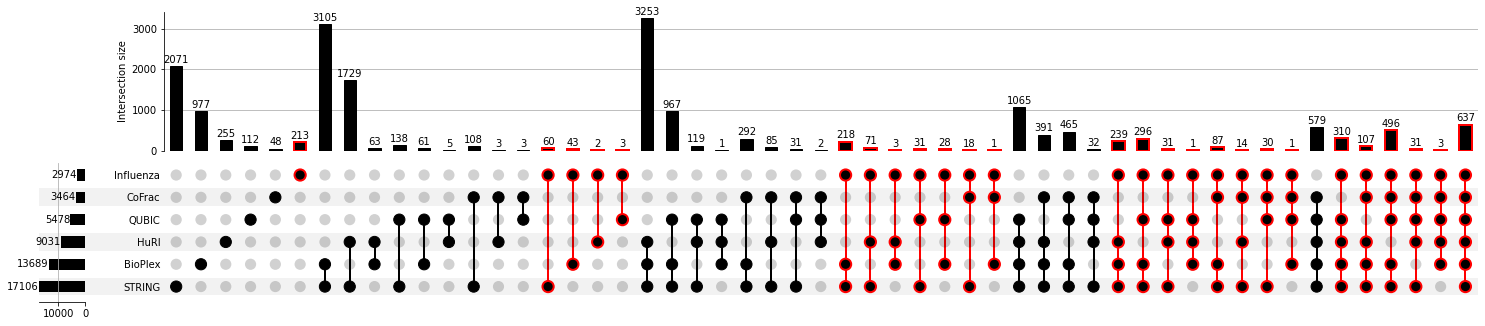

In [57]:
Data = Upset_prep(Influenza_df, 'Influenza')

Data = from_contents(Data)
Data
upset = UpSet(Data, subset_size='count', show_counts=True)
upset.style_subsets(present="Influenza", edgecolor="red",
                    linewidth=2)
upset.plot()

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

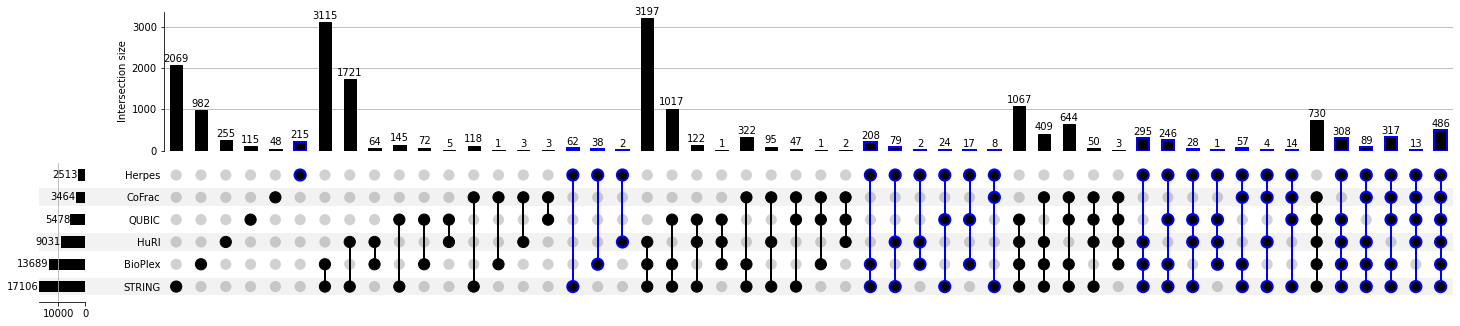

In [58]:
Data = Upset_prep(Herpes_df, 'Herpes')

Data = from_contents(Data)
Data
upset = UpSet(Data, subset_size='count', show_counts=True)
upset.style_subsets(present="Herpes", edgecolor="blue",
                    linewidth=2)
upset.plot()

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

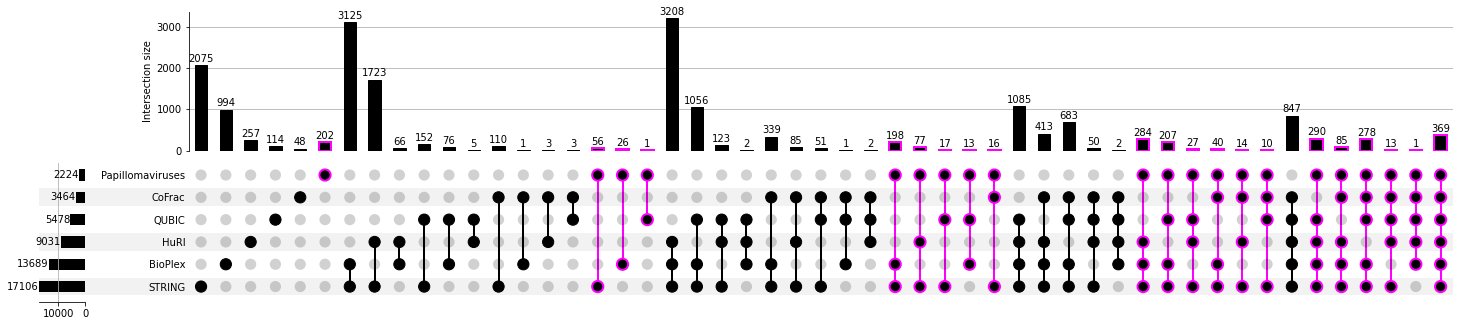

In [59]:
Data = Upset_prep(Papillomaviruses_df, 'Papillomaviruses')

Data = from_contents(Data)
Data
upset = UpSet(Data, subset_size='count', show_counts=True)
upset.style_subsets(present="Papillomaviruses", edgecolor="magenta",
                    linewidth=2)
upset.plot()

In [60]:
# !pip install upsetplot

In [61]:
# https://downloads.thebiogrid.org/File/BioGRID/Release-Archive/BIOGRID-4.4.207/BIOGRID-ORGANISM-4.4.207.tab3.zip
# https://wiki.thebiogrid.org/doku.php/downloads
# http://pathguide.org/
# https://www.sciencedirect.com/science/article/pii/S1532046420300071#m0005
# https://sci-hub.se/10.1016/j.tibs.2017.02.006
# https://twin.sci-hub.se/6290/1ad8b5598c3e240d46a0e5b38580b4c2/luck2017.pdf#page=12&zoom=100,0,0
# http://mentha.uniroma2.it/download.php
# https://www.hsls.pitt.edu/obrc/index.php?page=URL1174589670
# https://watermark.silverchair.com/gkt1100.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAsAwggK8BgkqhkiG9w0BBwagggKtMIICqQIBADCCAqIGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQM4gYSzY0oNWfWoVqWAgEQgIICcwuQbHlpSdNMShS84QoPRqIoYwjd9KvLsDDDnEB3QNlVMBhhokcbFqkscKkKEK8rI7iVH8VjHD0dxjJcU7eXPmzUWB3QuStQTDsOS73wh9q4UFR3MYEJl9ghwGw8W24UQuDDV7IbrX77a8pdPip1tO10WxvwfrRKtaWqECxgOIqf18qJHCCN9Ea4OqBHNBA-B9mu3nB3hwWdXVwtTPdbK2ASU_8gFCR4Oei2KvhK4RHnu8HfwL1a9hUsG4xFeWTujKtvHbExH99jLhV50v0Y_kkWAA1200i7WA9E4iNCR0pAuadTZm4xH-z3dEHNwKJtZjIYsby-W5no6Rry8Efj_IcjTmUe_hgUgFSSKVb7mmFW-i8d72oswQveLH036HBpsEK2Xa0_Wi52cpoJ7wVvJY-LniUQP60pMtvUG0aGkmZIpzGvDssb_RXuTQN-BcbRTwOoccE5MWzexmodLzHBB3dTBqmJgKUXFErAhWsWECFnruuFUMQLT7DKTY5A5q0mlrNAmnmBPASWJMmzSqYTFczWiZo7-th0aVquNhRBP14wt1euZ4ZQKdHHKwEctVat4doBkP3fGBddnlihbktVjbB3iMGu4iOknCdxKFx999yESzZ4aB-hnGD67AP4WtYOVPaLv6prGoPpLumW4yUDPj1xBIH8TigWeRzH4VvOKgho8MCMllG9ltKqymorygixQ_OoRMtO5f-YhYN8fNNFnECfsCYTtm_zh2IghXyo5AzZnoGiIO3HjnvqPSK-vdPiUitf_UfjJAQTrRa3jMfF4mBx0aZobs3hxw3dyICAMWwHSuqhFM-J0s3xN7LpPg90-pgfwg
# https://www.nature.com/articles/s41586-020-2188-x
# http://www.interactome-atlas.org/download
# http://useast.ensembl.org/biomart/martview/95543725eb96c3b83ea95011878b076b
# https://www.uniprot.org/uniprot/P00813
# https://stackoverflow.com/questions/37333299/splitting-a-pandas-dataframe-column-by-delimiter
# https://www.uniprot.org/uniprot/A0FGR8
# https://string-db.org/cgi/network?taskId=bOMFVNx6w50i&sessionId=boQqB60jRmId
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html
# https://stackoverflow.com/questions/19841535/python-matplotlib-venn-diagram
# https://towardsdatascience.com/how-to-create-and-customize-venn-diagrams-in-python-263555527305
# https://upsetplot.readthedocs.io/en/stable/formats.html#Use-DataFrame-as-input:
# https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe
# https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
